# Excercise 1: Autoencoder

We have allready seen a simple MLP model for **MNIST** classification:

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Get the data as Numpy arrays
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Build a simple model
inputs = keras.Input(shape=(28, 28))
l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(inputs)
l2 = layers.Flatten()(l1)
l3 = layers.Dense(128, activation="tanh")(l2)
l4 = layers.Dense(128, activation="tanh")(l3)
outputs = layers.Dense(10, activation="softmax")(l4)
model = keras.Model(inputs, outputs)
model.summary()

# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy")

# Train the model for 1 epoch from Numpy data
batch_size = 64
print("Fit on NumPy data")
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=1)

# Train the model for 1 epoch using a dataset
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(batch_size)
print("Fit on Dataset")
history = model.fit(dataset, epochs=1)

11493376/11490434 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
rescaling (Rescaling)        (None, 28, 28)            0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable 

Now we want to change this model and build an **autoencoder** for **MNIST**:

**1. change the network topology:** 
* use 5 dense layers to form "bottleneck" network (see lecture). 
* Layers 1+2 should be the encoder, 3 the lattent layer aner 4+5 the decoder
* remove the softmax (we are not doing a classification anymore)

**2. change the loss-function to compare input and output -> choose a suitable loss from https://keras.io/api/losses/**

**3. train the model**

**4. test the model**
* visualize input and output images to inspect the reconstruction quallity (use MATPLOTLIB *imshow*)
* implement a function to measure the reconstrunction error between in- and output
* change network size (number of neurons per layer) and training paramters to optimize the ressults 

**5. Outlier detection**
* plot a histogram over the the recostruction errors
* find a cutoff value and visualize the outliers

In [2]:
myinputs = keras.Input(shape=(784,))
#l1 = layers.experimental.preprocessing.Rescaling(1.0 / 255)(myinputs)
#l2 = layers.Flatten()(l1)
encode1 = layers.Dense(784, activation='tanh')(myinputs)
encode2 = layers.Dense(64, activation="tanh")(encode1)
latent = layers.Dense(10, activation="tanh")(encode2)
decode1 = layers.Dense(64, activation="tanh")(latent)
decode2 = layers.Dense(784, activation="sigmoid")(decode1)
#reshape = layers.Reshape([28,28])(decode2)
#myoutputs = layers.experimental.preprocessing.Rescaling(255)(reshape)
mymodel = keras.Model(myinputs, decode2)
mymodel.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                650       
_________________________________________________________________
dense_6 (Dense)              (None, 64)                704       
_________________________________________________________________
dense_7 (Dense)              (None, 784)               50960     
Total params: 717,994
Trainable params: 717,994
Non-trainable params: 0
_____________________________________________________

In [0]:
optimizer = keras.optimizers.Adam(learning_rate=0.01)
mymodel.compile(optimizer=optimizer, loss="binary_crossentropy")

In [0]:
batch_size = 32

In [0]:
x_train = x_train /255
x_test = x_test /255

x_train = x_train.reshape(len(x_train), 784)
x_test = x_test.reshape(len(x_test), 784)

In [6]:
x_train.shape

(60000, 784)

In [7]:
autoencoder = mymodel.fit(x_train, x_train,
                epochs=15,
                batch_size=batch_size,
                #shuffle=False,
                validation_data=(x_test, x_test))

Epoch 1/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2377 - val_loss: 0.2235
Epoch 2/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2180 - val_loss: 0.2134
Epoch 3/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2126 - val_loss: 0.2106
Epoch 4/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2104 - val_loss: 0.2066
Epoch 5/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2085 - val_loss: 0.2062
Epoch 6/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2077 - val_loss: 0.2062
Epoch 7/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2072 - val_loss: 0.2041
Epoch 8/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2060 - val_loss: 0.2051
Epoch 9/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2062 - val_loss: 0.2039
Epoch 10/15
1875/1875 [==============================] - 7s 4ms/step - loss: 0.205

In [8]:
print(autoencoder.history)

{'loss': [0.23769676685333252, 0.21798734366893768, 0.21262246370315552, 0.21040962636470795, 0.20850324630737305, 0.2077401578426361, 0.20715342462062836, 0.20600226521492004, 0.20623056590557098, 0.20579741895198822, 0.20585127174854279, 0.2065597027540207, 0.20535872876644135, 0.20674721896648407, 0.21131111681461334], 'val_loss': [0.223497673869133, 0.2134236842393875, 0.21059760451316833, 0.20663537085056305, 0.20619961619377136, 0.2061726301908493, 0.20413191616535187, 0.20514479279518127, 0.20388400554656982, 0.20407474040985107, 0.20797529816627502, 0.20978036522865295, 0.20422367751598358, 0.2042749971151352, 0.20867548882961273]}


In [9]:
print(x_test.shape)

(10000, 784)


In [22]:
predictions = mymodel.predict(x_test, batch_size=batch_size)
print(predictions.shape)

(10000, 784)


In [0]:
import matplotlib.pyplot as plt

In [0]:
sampleNumber = 30

In [0]:
input_image = x_train[sampleNumber:sampleNumber+1,:].reshape(28,28)

In [0]:
output_image = predictions[sampleNumber:sampleNumber+1,:].reshape(28,28)

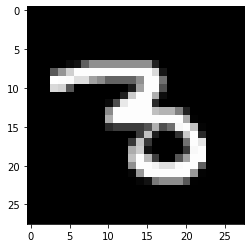

In [27]:
plt.imshow(input_image)

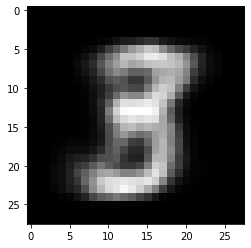

In [28]:
plt.imshow(output_image)

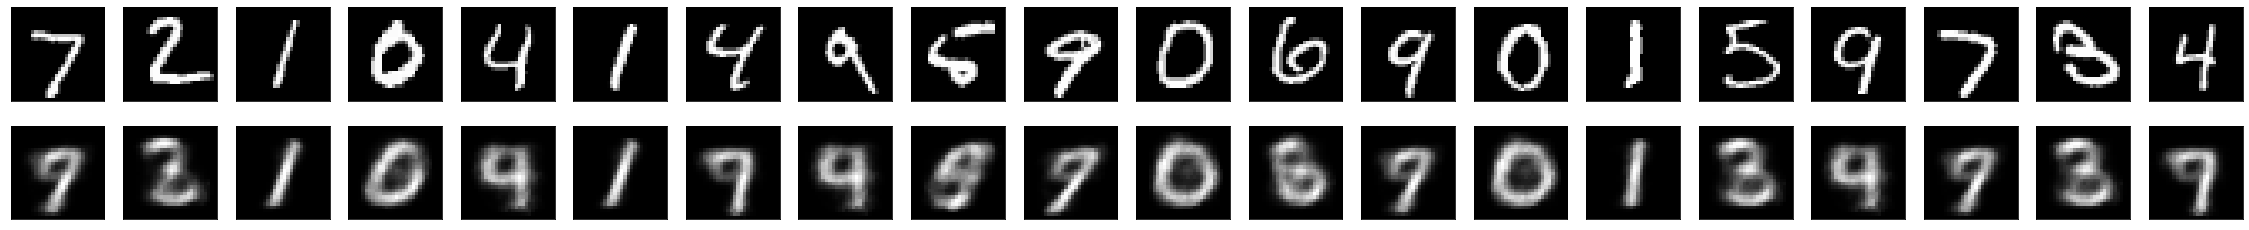

In [29]:
n = 20  # how many digits we will display
plt.figure(figsize=(40, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(predictions[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [0]:
def reconstruction_error(original, reconstructed):
  rec_error = np.absolute(original - reconstructed).sum()
  return rec_error

In [21]:
reconstruction_error(x_test[6], predictions[6])

88.79620252449301

In [0]:
#encoder = keras.Model(myinputs, latent)
#encoded_imgs = encoder.predict(x_test)

#encoded_input = keras.Input(shape=(10,))

#decoder_layer = mymodel.layers[-4]

#decoder = keras.Model(encoded_input, decoder_layer(encoded_input))
#decoded_imgs = decoder.predict(encoded_imgs)

#decoderInput = mymodel.layers[-4]
#decodeLayer1 = layers.Dense(32, activation="tanh")(decoderInput)
#decodeOutputs = layers.Dense(784, activation="tanh")(decodeLayer1)
#decodeReshape = layers.Reshape([28,28])(decodeLayer2)
#decodeOutputs = layers.experimental.preprocessing.Rescaling(255)(decodeReshape)
#mymodel = keras.Model(encoded_input, decodeOutputs)

In [0]:
#decoderInput = mymodel.layers[-4]
#decodeLayer1 = layers.Dense(32, activation="tanh")(decoderInput)
#decodeOutputs = layers.Dense(784, activation="tanh")(decodeLayer1)
#mymodel = keras.Model(encoded_input, decodeOutputs)

#encoded_imgs = encoder.predict(x_test)
#decoded_imgs = decoder.predict(encoded_imgs)

#n = 10  # how many digits we will display
#plt.figure(figsize=(20, 4))
#for i in range(n):
    # display original
#    ax = plt.subplot(2, n, i + 1)
#    plt.imshow(x_test[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)

    # display reconstruction
#    ax = plt.subplot(2, n, i + 1 + n)
#    plt.imshow(decoded_imgs[i].reshape(28, 28))
#    plt.gray()
#    ax.get_xaxis().set_visible(False)
#    ax.get_yaxis().set_visible(False)
#plt.show()